# Nome: Getúlio Rodrigues Silva
## Aplicando Técnicas da Metodologia CRISP-DM

### Entendimento do Negócio

Sabe-se que o custo com a manutenção do sistema de ar de caminhões tem crescido nos últimos anos. 
Mesmo mantendo um número de caminhões relativamente constante.

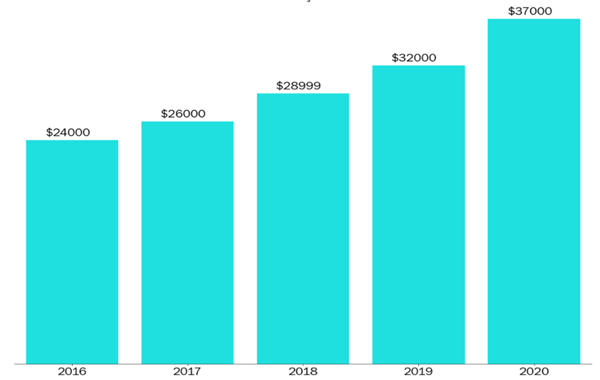

Objetivo: Diminuir o custo de acordo com um estudo aprofundado dos dados.
* Se o caminhão é mandado para manutenção e não tem defeito no sistema de ventilação. o custo é de $10.
* Se o caminhão é mandado para manutenção e possui defeito no sistema de ventilação. O custo é de $25.
* Se o caminhão não é mandado para a manutenção e possui defeito. O custo é $500 devido manutenção corretiva.

Podemos reduzir as despesas com esse tipo de manutenção usando técnicas de IA?

Quais são os principais fatores que apontam uma possível falha nesse sistema? 

### Entendimento dos dados

Coluna de classe(atributo alvo) assume os valores:
pos: Se um caminhão apresentou defeito no sistema de ventilação.
neg: Se um caminhão apresentou defeito em qualquer outro sistema a não ser o de ventilação.

Dados recebidos com features criptografadas: 
Conjunto dos dados anos anteriores -> Treinamento
Conjunto com dados do ano presente -> Teste


### Importação das bibliotecas

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

### Leitura dos dados

In [46]:
df_train = pd.read_csv('air_system_previous_years.csv')
df_test = pd.read_csv('air_system_present_year.csv')
display(df_train)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [47]:
display(df_test)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


### Limpeza e Tratamento de Dados

In [48]:
# Substituindo valor 'na' por dados vazios para se fazer a remoção de colunas de nulos
df_train.replace('na', np.nan, inplace = True) 

# Substituindo valores de class neg = 0 
df_train['class'].replace('neg', 0, inplace = True)

# Substituindo valores de class pos = 1 
df_train['class'].replace('pos', 1, inplace = True)

# Caso existam dados duplicados removê-los do dataframe
df_train.drop_duplicates(inplace = True)

# Colocando a label em uma variável separada para futuras análises
y_train = df_train['class']
df_train.drop(['class'],axis =1, inplace=True)

In [49]:
# As substituições feitas no conjunto de treinamento, também devem ser feitas no conjunto de testes 
# Substituindo valor 'na' por dados vazios para se fazer a remoção de colunas de nulos
df_test.replace('na', np.nan, inplace = True) 

# Substituindo valores de class neg = 0 
df_test['class'].replace('neg', 0, inplace = True)

# Substituindo valores de class pos = 1 
df_test['class'].replace('pos', 1, inplace = True)

#Caso existam dados duplicados removê-los do dataframe
df_test.drop_duplicates(inplace = True)

#Colocando a label em uma variável separada
y_test = df_test['class']
df_test.drop(['class'],axis =1, inplace=True)

In [50]:
df_test

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60,0,20,12,0,0,0,0,0,2682,...,1098,138,412,654,78,88,0,0,0,0
1,82,0,68,40,0,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,66002,2,212,112,0,0,0,0,0,199486,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,59816,NaN,1010,936,0,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,1814,NaN,156,140,0,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852,NaN,2130706432,892,0,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,18,0,52,46,8,26,0,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,79636,NaN,1670,1518,0,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,110,NaN,36,32,0,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


In [51]:
# ((df_train.isnull().sum()/df_train.shape[0]) > 0.03).sum()

In [52]:
# Removendo colunas em que mais de 50% dos valores são nulos e armazenando o nome dos atributos em uma variável.
colunas_removidas_nulos = df_train.columns[df_train.isnull().mean() > 0.5]
df_train.drop(columns=colunas_removidas_nulos, axis=1, inplace=True)

# Aplicando função para transformar os dados para numericos 
df_train = df_train.apply(pd.to_numeric)

# Preenchendo dados NaN com a média de seu atributo
df_train.fillna(df_train.mean(),inplace=True)

In [53]:
# Distribuições estatísticas, normal(Z)
# Extraindo uma descrição estatística básica do Dataframe mostrando média, desvio padrão, mínimos, máximos e valores dos quartis.
df_train.describe()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,5.933650e+04,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,4.370966e+05,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,7.724678e+08,3.504515e+07,158.142022,205.375337,2.036363e+04,3.400875e+04,1.494791e+05,7.574598e+05,2.360968e+06,...,1.149060e+06,5.402722e+05,1.161763e+06,1.114758e+06,1.063164e+06,1.718366e+06,4.469894e+05,4.720424e+04,4.268529,8.627929
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,2.000000e+01,4.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.180000e+02,...,3.033500e+03,1.204000e+03,2.848500e+03,3.839000e+03,5.600000e+02,1.180000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,1.880000e+02,2.880000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.881000e+03,...,2.397270e+05,1.148530e+05,2.283220e+05,1.960600e+05,9.976600e+04,4.358700e+04,4.474000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,1.686000e+03,8.426500e+03,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.361500e+04,...,4.454897e+05,2.164440e+05,4.624655e+05,4.003010e+05,2.833455e+05,1.732245e+05,1.387300e+05,2.366000e+03,0.000000,0.000000
max,2.746564e+06,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,2.288306e+08,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [54]:
# Pude observar que em vários atributos até o quartil de 75% temos valor 0, isso traz pouca explicabilidade para os dados, então não faz sentido mantê-los
colunas_removidas_quartil = df_train.columns[df_train.quantile(0.75) == 0] 
df_train.drop(columns=colunas_removidas_quartil, axis=1, inplace=True)

In [55]:
df_train

,aa_000,ac_000,ad_000,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,76698,2.130706e+09,280.000000,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,...,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0
1,33058,0.000000e+00,190620.639314,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,...,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0
2,41040,2.280000e+02,100.000000,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,...,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0
3,12,7.000000e+01,66.000000,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,...,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0
4,60874,1.368000e+03,458.000000,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,...,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,6.640000e+02,186.000000,59100.0,1603216.0,6015982.0,1968266.0,164972.0,12560.0,4880368.0,...,1608808.0,1479066.0,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0
59996,2286,2.130707e+09,224.000000,104.0,99186.0,36564.0,128.0,0.0,0.0,56982.0,...,13934.0,15024.0,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0
59997,112,2.130706e+09,18.000000,28.0,11592.0,11538.0,0.0,0.0,0.0,8784.0,...,15876.0,2740.0,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0
59998,80292,2.130706e+09,494.000000,330.0,202498.0,3251010.0,2061456.0,360436.0,59754.0,2634394.0,...,1180714.0,1709450.0,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0


In [56]:
colunas_removidas_quartil

Index(['ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ai_000',
       'aj_000', 'ak_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'ay_000',
       'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_009', 'az_007', 'az_008',
       'az_009', 'ch_000', 'cj_000', 'cn_000', 'cn_001', 'cs_009', 'da_000',
       'df_000', 'dg_000', 'dh_000', 'di_000', 'dj_000', 'dk_000', 'dl_000',
       'dm_000', 'dz_000', 'ea_000', 'ef_000', 'eg_000'],
      dtype='object')

In [57]:
colunas_removidas_nulos

Index(['ab_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000',
       'cr_000'],
      dtype='object')

In [58]:
# Fazendo os mesmos tratamentos do conjunto de treino para conjunto de testes
df_test.drop(columns=colunas_removidas_nulos, axis=1, inplace=True)
df_test.drop(columns=colunas_removidas_quartil, axis=1, inplace=True)
df_test = df_test.apply(pd.to_numeric)
df_test.fillna(df_train.mean(),inplace=True)
df_test

,aa_000,ac_000,ad_000,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,60,2.000000e+01,12.0,4736.0,3862.0,1846.0,0.0,0.0,0.0,3976.0,...,7502.0,3156.0,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0
1,82,6.800000e+01,40.0,748.0,12594.0,3636.0,0.0,0.0,0.0,5244.0,...,10040.0,3310.0,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0
2,66002,2.120000e+02,112.0,1358536.0,1952422.0,452706.0,25130.0,520.0,0.0,1891670.0,...,396312.0,538136.0,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0
3,59816,1.010000e+03,936.0,123922.0,984314.0,1680050.0,1135268.0,92606.0,14038.0,1772828.0,...,659550.0,691580.0,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0
4,1814,1.560000e+02,140.0,72.0,17926.0,82834.0,3114.0,0.0,0.0,48978.0,...,10216.0,9958.0,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852,2.130706e+09,892.0,5486.0,704012.0,3220278.0,1297498.0,76170.0,7206.0,2276100.0,...,883900.0,983308.0,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0
15996,18,5.200000e+01,46.0,6444.0,3308.0,2720.0,0.0,0.0,0.0,3740.0,...,9354.0,2746.0,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0
15997,79636,1.670000e+03,1518.0,15062.0,1991298.0,2768440.0,329148.0,13124.0,990.0,2156280.0,...,450380.0,1073658.0,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0
15998,110,3.600000e+01,32.0,198.0,3730.0,27418.0,978.0,0.0,0.0,12790.0,...,22688.0,5698.0,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0


In [59]:
corr = df_train.corr()
# corr.describe()

In [60]:
# sns.set_theme(style="dark")

# # Generate a mask for the upper triangle
# mask_strong_corr = corr.abs() < 0.7
# mask = np.triu(np.ones_like(corr, dtype=bool)) | mask_strong_corr

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5)

### Normalização de Dados

In [61]:

scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)

In [62]:
# Aplicando PCA (Análise de Componentes principaiis para redução de dimensionalidade)
pca = PCA(n_components=0.999)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.shape[0])

[3.94987404e-01 5.80930593e-02 4.40571496e-02 3.81983352e-02
 2.96340074e-02 2.47942755e-02 2.18781112e-02 1.92795498e-02
 1.77594671e-02 1.51809621e-02 1.49451769e-02 1.41203768e-02
 1.36398727e-02 1.29699197e-02 1.25221846e-02 1.04197440e-02
 9.95865019e-03 9.74681752e-03 9.47359884e-03 9.21985243e-03
 9.07656805e-03 8.69071040e-03 8.56733638e-03 7.98396304e-03
 7.79284160e-03 7.42423284e-03 7.21597275e-03 6.93726186e-03
 6.66876230e-03 6.57118759e-03 6.43043567e-03 6.10214847e-03
 5.97099869e-03 5.85984326e-03 5.39885348e-03 5.34035968e-03
 4.91008051e-03 4.82845474e-03 4.55852551e-03 4.39194322e-03
 4.24202092e-03 4.11621309e-03 3.87594572e-03 3.81189704e-03
 3.61186807e-03 3.42095901e-03 3.27793592e-03 3.04494043e-03
 2.95017035e-03 2.80741721e-03 2.66354408e-03 2.57632518e-03
 2.49983780e-03 2.44186320e-03 2.28752738e-03 2.19236504e-03
 2.13823540e-03 2.01291431e-03 1.89396536e-03 1.88133864e-03
 1.78985284e-03 1.70413244e-03 1.66667985e-03 1.60593706e-03
 1.53583400e-03 1.484278

In [63]:
rf = RandomForestClassifier(max_depth=2,n_estimators=9, random_state=0, class_weight='balanced')


print(classification_report(y_train, cross_val_predict(rf, x_train_scaled,y_train, cv = 10)))
rf.fit(x_train_scaled, y_train)
pred = rf.predict(x_test_scaled)
print('F1-Score do modelo: ', f1_score(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     59000
           1       0.20      0.94      0.33      1000

    accuracy                           0.94     60000
   macro avg       0.60      0.94      0.65     60000
weighted avg       0.99      0.94      0.96     60000

F1-Score do modelo:  0.4277251184834123


In [64]:
rf = RandomForestClassifier(max_depth=2,n_estimators=9, random_state=0, class_weight='balanced')


print(classification_report(y_train, cross_val_predict(rf, x_train_pca,y_train, cv = 10)))
rf.fit(x_train_pca, y_train)
pred = rf.predict(x_test_pca)
print('F1-Score do modelo: ', f1_score(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97     59000
           1       0.19      0.93      0.32      1000

    accuracy                           0.93     60000
   macro avg       0.60      0.93      0.64     60000
weighted avg       0.99      0.93      0.95     60000

F1-Score do modelo:  0.423444976076555


              precision    recall  f1-score   support

           0       1.00      0.94      0.97     59000
           1       0.21      0.94      0.34      1000

    accuracy                           0.94     60000
   macro avg       0.60      0.94      0.65     60000
weighted avg       0.99      0.94      0.96     60000

F1-Score do modelo:  0.4707429322813938


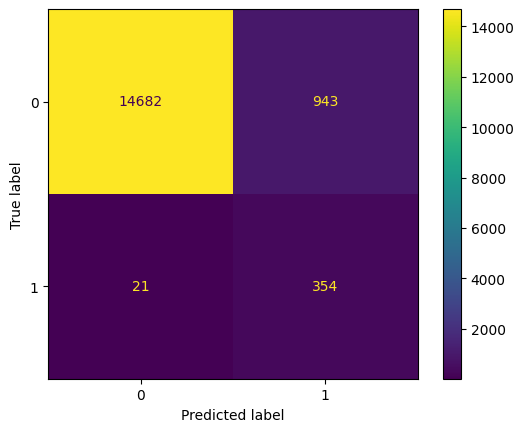

In [65]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred), display_labels=rf.classes_,).plot()
plt.grid(False)
plt.show()